# Teoría de los Circuitos II - R4001  #
# Tarea Semanal 4 Bis Bis - Albero Federico, Jimenez Copati Juani, Fiasche Nahuel #

# Cálculo Analítico
A continuación, se adjunta en formato PDF todos los cálculos analíticos, a saber:
<ul>
  <li>Obtención de plantilla de diseño pasabanda objetivo (normalizada) </li>
  <li> Obtención de plantilla de diseño del pasabajos prototipo (también normalizado) </li>
  <li>Cálculo de la Transferencia Pasabanda Normalizada</li>
  <li>Implementación de la Red Normalizada utilizando estructuras Pasivas</li>
  <li>Activación del Circuito Utilizando un GIC Pasabanda</li>
  <li>Cálculo de etapa adicional de salida para aumento de ganancia del circuito</li>

</ul>

In [2]:
from IPython.display import IFrame
IFrame("./TS4_Bis_Bis.pdf", width=1000, height=900)

# Cálculos Simbólicos y Simulación Numérica (Normalizada)

### Filtro pasabajos prototipo de Orden 3 normalizado

<IPython.core.display.Math object>

### Filtro pasabanda de Orden 3 normalizado

<IPython.core.display.Math object>

### Filtro pasabanda de Orden 3 Factorizado y Normalizado

<IPython.core.display.Math object>

### Simulación Numérica

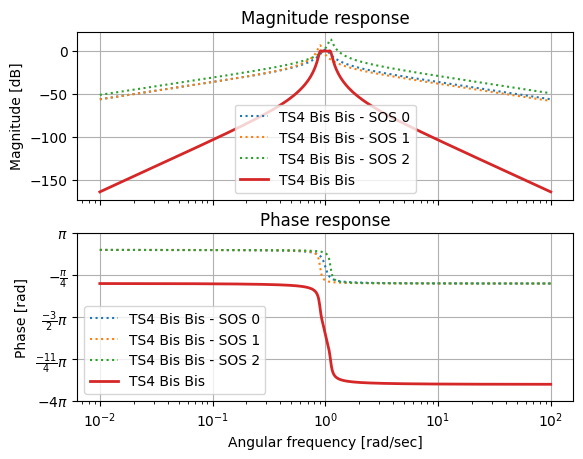

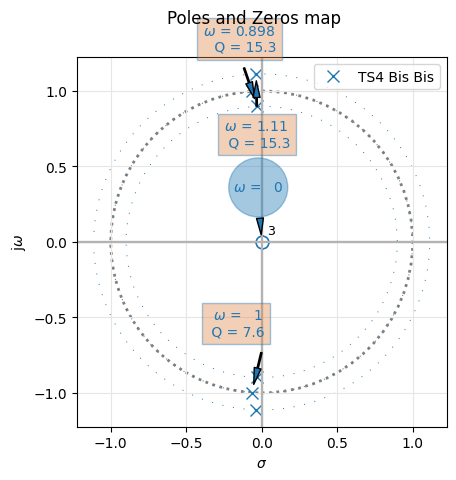

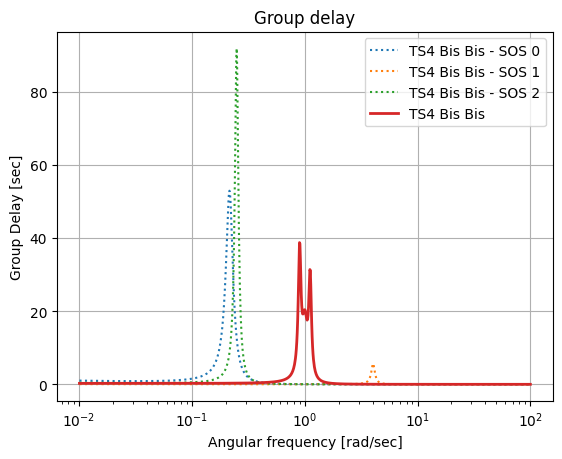

In [1]:
# Módulos externos

import sympy as sp
from sympy.abc import s
# Ahora importamos las funciones de PyTC2

from pytc2.sistemas_lineales import analyze_sys, parametrize_sos, pretty_print_lti, pretty_print_bicuad_omegayq, tf2sos_analog, pretty_print_SOS
from pytc2.general import print_latex, print_subtitle
import numpy as np
import scipy.signal as sig
from IPython.display import display, Markdown

# Librerías externas NumPy, SciPy y Matplotlib
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np
from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot, analyze_sys

#Definicion de Constantes
alpha_max = 0.5
n = 3 #Orden del Filtro

# Cálculo de Epsilon
ee = (10**(alpha_max/10) - 1) # epsilon²

# Coeficientes de la transferencia Pasabajos Prototipo
[Tlp_num,Tlp_den]=sig.cheby1(n,alpha_max,1.05,analog=True)

display(Markdown('### Filtro pasabajos prototipo de Orden 3 normalizado' ))

pretty_print_lti(Tlp_num,Tlp_den)

# Q de la transformación
Q_bp = 5

# Transformación y Visualización de Pasabajos Prototipo a Pasabanda Requerido
num_pbanda, den_pbanda = sig.lp2bp(Tlp_num, Tlp_den, bw = 1/Q_bp)

display(Markdown('### Filtro pasabanda de Orden 3 normalizado' ))

pretty_print_lti(num_pbanda, den_pbanda)

#Factorización y Visualización
sos_Tf = tf2sos_analog(num_pbanda, den_pbanda)

display(Markdown('### Filtro pasabanda de Orden 3 Factorizado y Normalizado' ))

pretty_print_SOS(sos_Tf)

# Simulación Numérica

display(Markdown('### Simulación Numérica' ))

Tf = TransferFunction(num_pbanda,den_pbanda)

analyze_sys( sos_Tf, 'TS4 Bis Bis' )


# Simulación Circuital de la Implementación Pasiva Normalizada

La implementación pasiva a simular se adjunta a continuación.

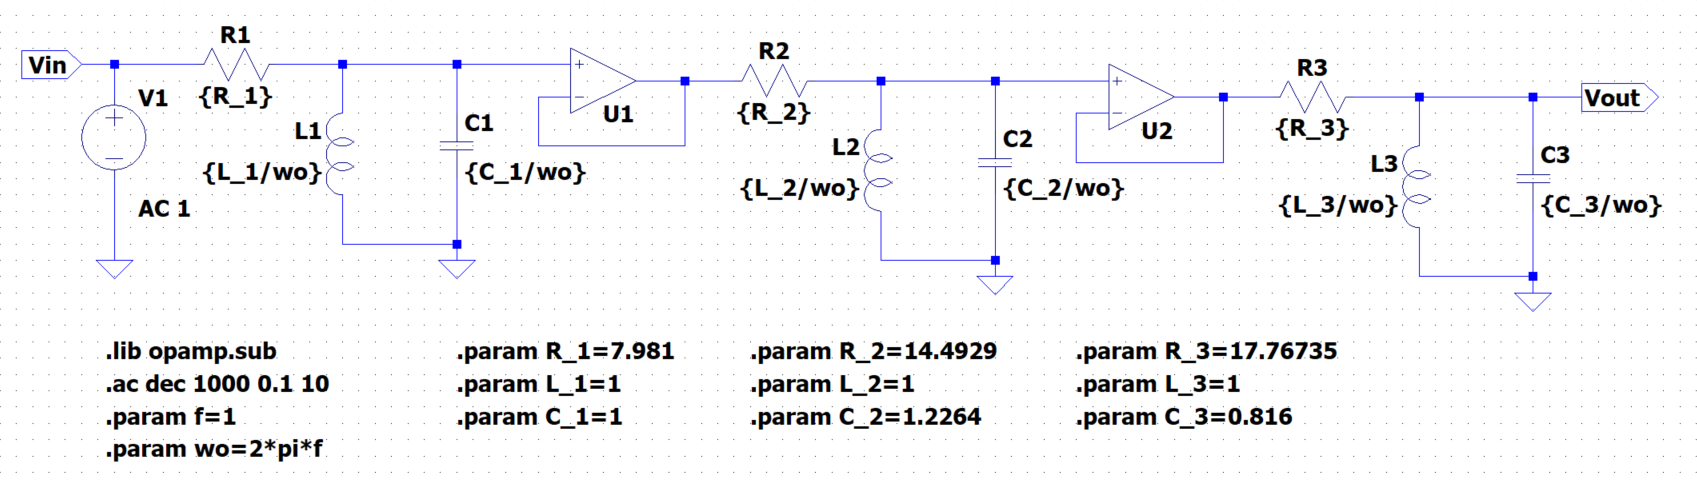


La Simulación Obtenida se encuentran a continuación.

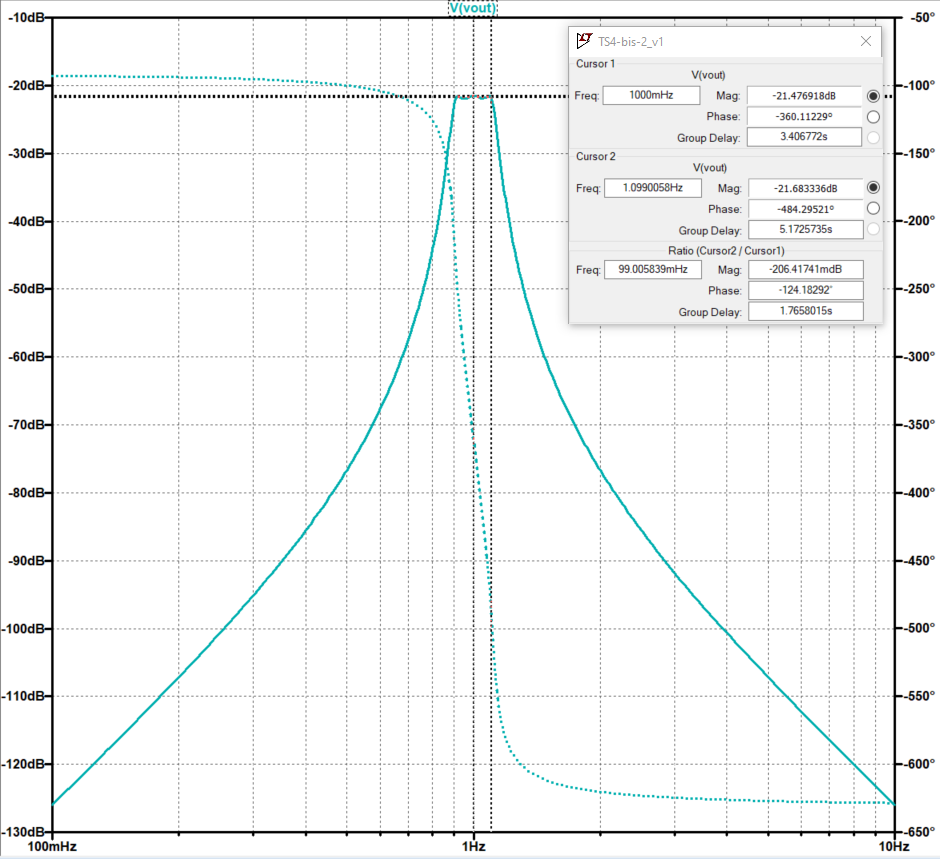

**Analisis de la simulación:**
* Se realizó un gráfico de respuesta en frecuencia angular normalizada para asi poder visualizar mejor la respuesta en frecuencia del filtro y poder efectuar las mediciones correspondientes. Se utilizó como norma de frecuencia $\Omega_w$ la frecuencia central de la banda de paso del filtro. $\Omega_w = 2 \pi \cdot f_o = 2 \pi \cdot 22KHz$


* Se puede apreciar la respuesta del tipo Chebyshev en la banda de paso del filtro, de acuerdo a lo solicitado en la plantilla de diseño

* Debido a que la implementación fue realizada con componentes pasivos, la ganancia en la banda de paso no es de 0 dB, es decir que el filtro presenta un atenuación en dicha banda de paso.

* Se cumple con un ripple máximo de -0.5 dB en la banda de paso.

# Simulación Circuital de la Implementación Activa Normalizada

La implementación activa a simular se adjunta a continuación.

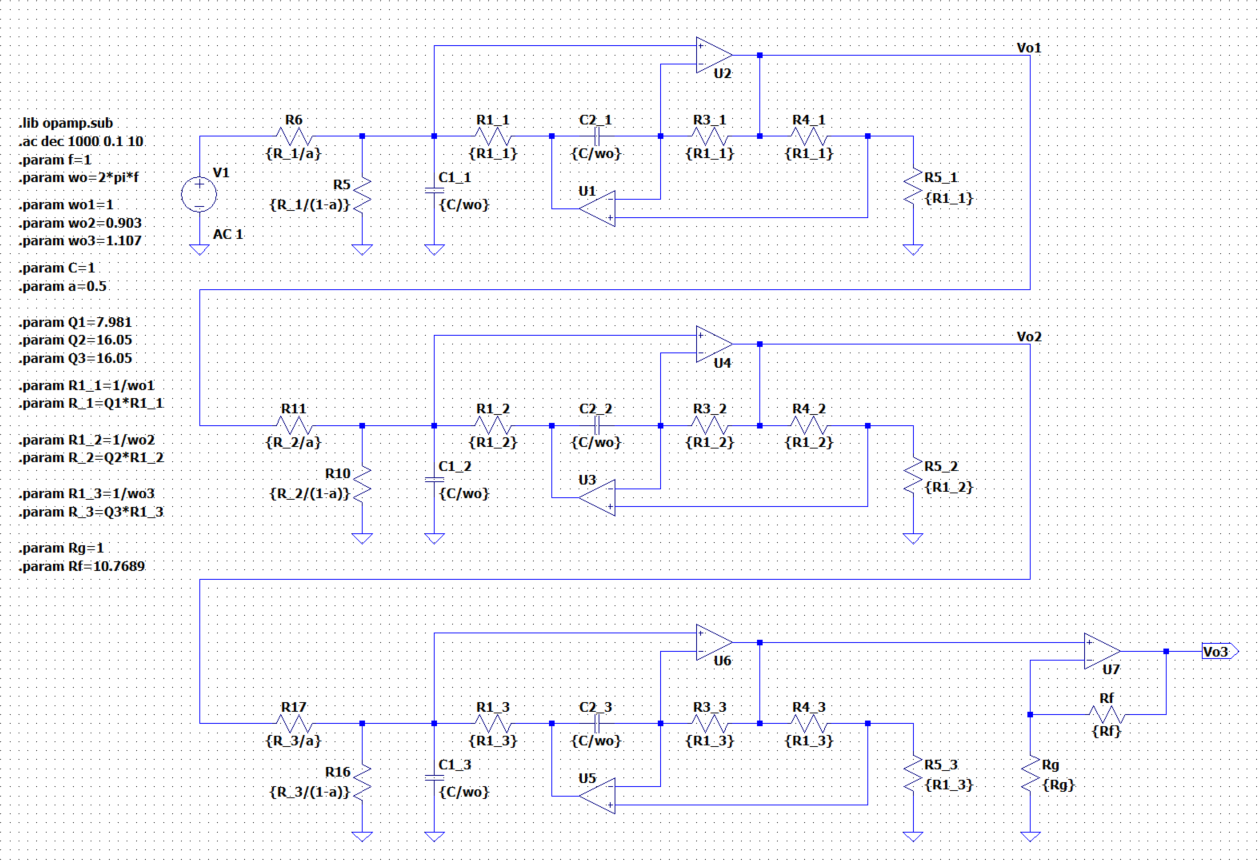

La Simulación Obtenida se encuentra a continuación.

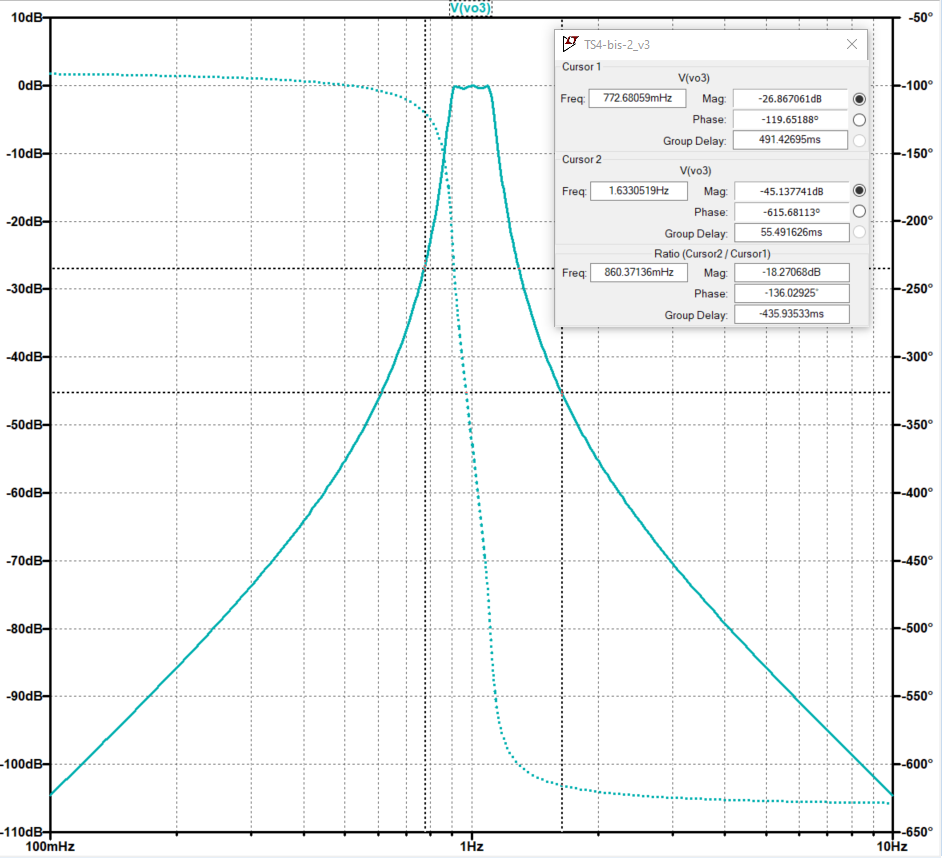

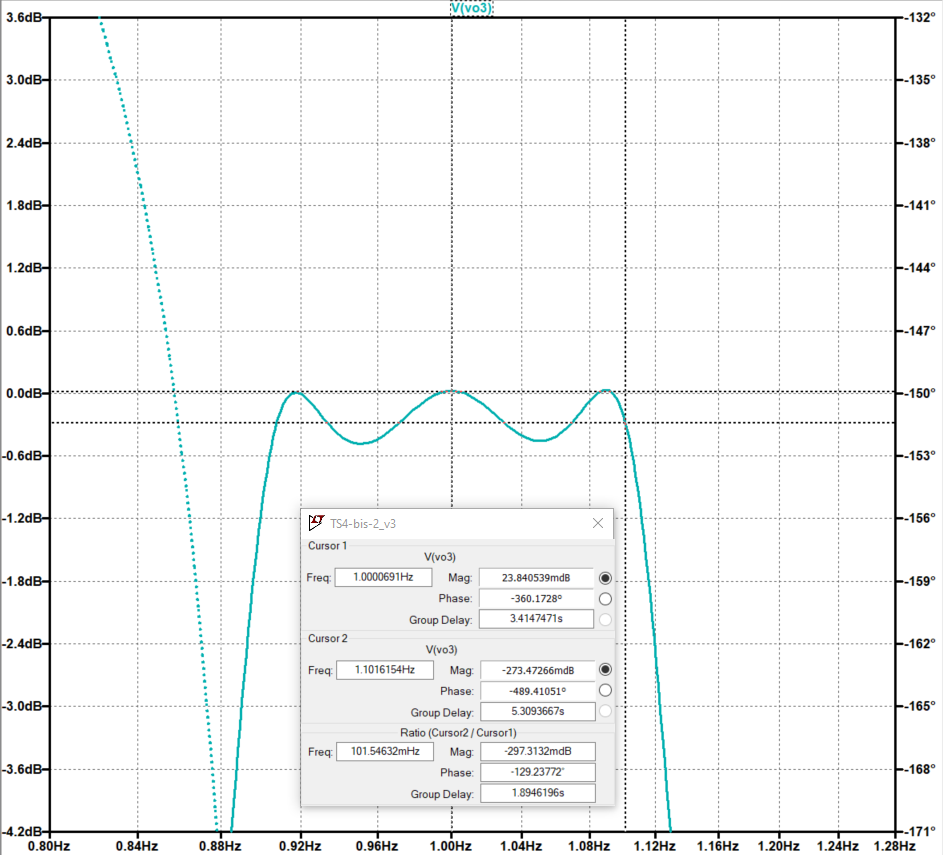

**Analisis de la simulación:**
* Se realizó un gráfico de respuesta en frecuencia angular normalizada para asi poder visualizar mejor la respuesta en frecuencia del filtro y poder efectuar las mediciones correspondientes. Se utilizó como norma de frecuencia $\Omega_w$ la frecuencia central de la banda de paso del filtro. $\Omega_w = 2 \pi \cdot f_o = 2 \pi \cdot 22KHz$

* Se puede apreciar la respuesta del tipo Chebyshev en la banda de paso del filtro, de acuerdo a lo solicitado en la plantilla de diseño.

* Debido a que la implementación fue realizada con componentes activos y se agregó una etapa de ganancia en la etapa de salida, conformado por un amplificador operacional no inversor, la ganancia en la banda de paso es de aproximadamente 0 dB.

* Se cumple con las atenuaciones mínimas especificadas en la plantilla de diseño: 
    * $|T{fs1}|  = -26.86dB$, cumpliendo de manera holgada el requerimiento de -16dB de atenuación
    * $|T{fs2}| = -45.13dB$, cumpliendo de manera holgada el requerimiento de -24dB de atenuación

* Se cumple con un ripple máximo de $-0.5 dB$ en la banda de paso.

# Conclusiones

Al realizar la simulación numérica, se observaron ligeras diferencias entre las transferencias obtenidas a partir del cálculo numérico. Utilizando cheby1 se obtuvo 

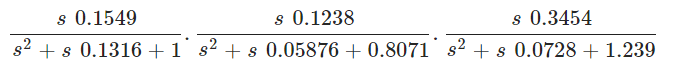

Mientras que utilizando cheby1ap

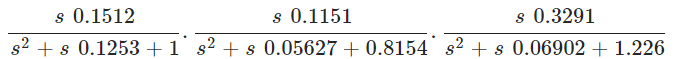

Dichas diferencias se debían a que algunos de los participantes utilizaron la función *cheb1ap* para el cálculo de la transferencia pasa bajos prototipo, mientras que otros utilizaron *cheby1*.

Por otro lado, se observa también que no es posible obtener una ganancia de 0 dB en la banda de paso del filtro en su implementación pasiva, ya que se requiere una ganancia en cada etapa parcial que los elementos pasivos no son capaz de proveer.

Se observa también que el filtro no es simétrico, por lo que la banda de paso no es simétrica y no presenta las mismas atenuaciones de ambos lados, es decir, está mucho más holgado de atenuación en un lado de la banda de paso.

Finalmente, se concluye que la red circuital obtenida implementa correctamente la transferencia pasabanda normalizada requerida.

# Anexo: Metodología de Trabajo en Equipo 

Para la realización del presente trabajo, los diferentes integrantes del grupo trabajaron de forma individual en el cálculo analítico de la transferencia para luego comparar los resultados obtenidos. Dichos resultados fueron discutidos mediante un grupo de Telegram creado especialmente para esta Tarea Semanal, donde cada uno de los alumnos envió los resultados obtenidos y se intercambiaron ideas, además de ayudarse entre sí en cuestiones relacionadas a la simulación numérica utilizando Scipy.
En segundo lugar, los participantes se reunieron para discutir problemas con la implementación del circuito activo, ya que se trataba de una topología poco familiar. En esta instancia se recurrió a la bibliografía de la materia, en particular el Schaumann, donde se revisó el capítulo 4, y en particular las páginas 182 a 184.
Para confeccionar el Jupyter, se utilizaron los aportes que proveyó cada estudiante desarrollados en forma individual, con el objetivo de generar un documento colaborativo que represente el trabajo realizado por el grupo. 
    Se adjuntan a continuación las páginas del Schaumann que fueron de utilidad para el desarrollo del trabajo.

In [4]:
from IPython.display import IFrame
IFrame("./Schaumann_182-184.pdf", width=1000, height=900)

En particular, cada integrante desarrolló las siguientes tareas:

*  **Albero Federico**: Desarrolló en forma completa el trabajo, desde el cálculo analítico de la transferencia hasta las implementaciones circuitales, tanto pasiva como activa.</li>
*  **Fiasche Nahuel**: Desarrolló en forma parcial el trabajo, desde el cálculo analítico de la transferencia hasta las implementacion pasiva. Se encargó de iniciar la redacción del informe</li>
*  **Jimenez Juani**: Desarrolló en forma parcial el trabajo, desde el cálculo analítico de la transferencia hasta las simulación numérica, aportando los resultados obtenidos para compararlos con los de sus compañeros y discutir resultados.

Fiasche y Albero supervisaron y asistieron el trabajo de Jimenez, principalmente con respecto a la simulación circuital en Scipy y con el uso de las Librerías PyTC2.